In [1]:
from lasagnekit.datasets.mnist import MNIST
import sys
import os
sys.path.append(os.getcwd()+"/..")
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tools.brushstroke.common import disp_grid
from itertools import product
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
def neighbcorr_filenames_multiplecorrelation(im, pad=3):
    # https://en.wikipedia.org/wiki/Multiple_correlation
    from sklearn.linear_model import LinearRegression
    xdata = defaultdict(list)
    ydata = defaultdict(list)
    for x in range(pad, im.shape[0] - pad):
        for y in range(pad, im.shape[1] - pad):
            pxc = im[x, y]
            dt = []
            for dx, dy in product((0, 1, -1), (0, 1, -1)):
                if dx == 0 and dy == 0:
                    continue
                px = im[x + dx, y + dy]
                dt.append(px)
            xdata[(x, y)].append(dt)
            ydata[(x, y)].append(pxc)
    rsqr_l = []
    
    x = xdata.values()
    y = ydata.values()
    x = np.array(x)
    y = np.array(y)
    x = x[:, 0]
    y = y[:, 0]
    rsqrt = np.sqrt(LinearRegression().fit(x, y).score(x, y))
    return rsqrt

/home/mcherti/work/code/external/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_train = MNIST(which='train')
data_train.load()
data_train.X = data_train.X>0.5

data_test = MNIST(which='test')
data_test.load()
data_test.X = data_test.X>0.5

In [14]:
data = h5py.File('../exported_data/datasets/dataset.hdf5', 'r')
X_orig = data['X'][0:100000]

In [23]:
X = X_orig.copy()
X /= X.max()

#X = X[X.mean(axis=1)<0.25]
#X = X[X.mean(axis=1)>0.08]
ind = np.arange(len(X))
np.random.shuffle(ind)
ind = ind[0:30000]
X = X[ind]

#corr = [neighbcorr_filenames_multiplecorrelation(im.reshape((28,28))) for im in X]
corr = np.array(corr)
#X = X[corr>0.9]
X = X[0:6000]

In [24]:
print(len(X))

6000


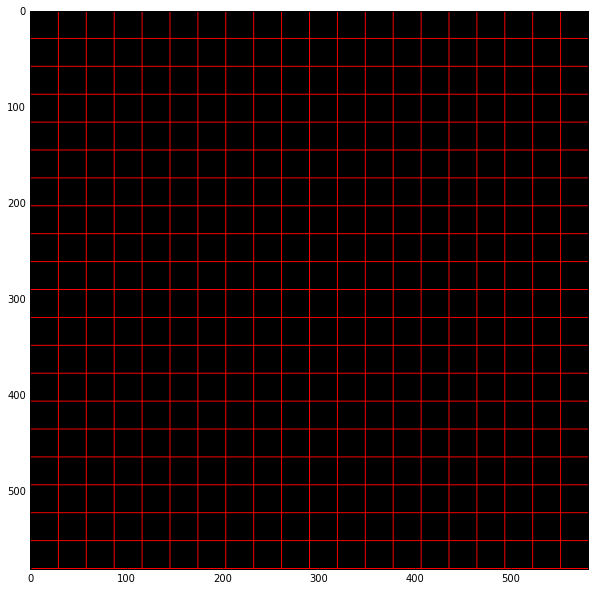

In [25]:
imgs = X
imgs = imgs.reshape((len(imgs), 1, 28, 28))
imgs = imgs[0:400]
img = disp_grid(imgs, border=1, bordercolor=(1,0,0))
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)

In [289]:
clf = MLPClassifier()
clf.fit(data_train.X, data_train.y)

MLPClassifier(activation='relu', algorithm='adam', alpha=0.0001,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [290]:
print(classification_report(clf.predict(data_test.X), data_test.y))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       996
          1       0.99      0.99      0.99      1139
          2       0.97      0.97      0.97      1033
          3       0.96      0.97      0.97       998
          4       0.97      0.98      0.97       976
          5       0.97      0.97      0.97       884
          6       0.97      0.98      0.97       949
          7       0.98      0.97      0.97      1036
          8       0.96      0.96      0.96       981
          9       0.96      0.96      0.96      1008

avg / total       0.97      0.97      0.97     10000



In [291]:
(clf.predict(data_test.X)==data_test.y).mean()

0.97250000000000003

In [292]:
clf = MLPClassifier()
X_augment = np.concatenate((data_train.X, X), axis=0)
y_augment = np.concatenate((data_train.y, [10]*len(X)), axis=0)

In [293]:
clf.fit(X_augment, y_augment)

MLPClassifier(activation='relu', algorithm='adam', alpha=0.0001,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [294]:
(clf.predict(data_train.X)==data_train.y).mean()

0.99968333333333337

In [295]:
preds = clf.predict_proba(data_test.X)
preds = [np.argmax(p[0:10]) for p in preds]
(preds==data_test.y).mean()

0.96879999999999999

In [296]:
print(classification_report(preds, data_test.y))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1001
          1       0.99      0.98      0.99      1153
          2       0.97      0.97      0.97      1025
          3       0.96      0.97      0.97      1000
          4       0.97      0.96      0.97       996
          5       0.97      0.96      0.96       907
          6       0.96      0.98      0.97       943
          7       0.97      0.96      0.97      1035
          8       0.95      0.97      0.96       957
          9       0.94      0.97      0.96       983

avg / total       0.97      0.97      0.97     10000

